In this notebook the datafiles are read in and merged into one pandas dataframe and a first look is taken at the data.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

id,Datum,Warengruppe,Umsatz

1307011,2013-07-01,1,148.828353112183


Deskriptive Statistiken:
                 id                          Datum  Warengruppe       Umsatz  \
count  9.334000e+03                           9334  9334.000000  9334.000000   
mean   1.559311e+06  2016-01-13 23:56:27.100921344     3.088172   206.749044   
min    1.307011e+06            2013-07-01 00:00:00     1.000000     7.051201   
25%    1.410123e+06            2014-10-12 00:00:00     2.000000    96.897441   
50%    1.601102e+06            2016-01-10 00:00:00     3.000000   161.900831   
75%    1.704223e+06            2017-04-22 00:00:00     4.000000   280.644663   
max    1.807315e+06            2018-07-31 00:00:00     6.000000  1879.461831   
std    1.512503e+05                            NaN     1.489002   144.545189   

       KielerWoche   Bewoelkung   Temperatur  Windgeschwindigkeit  \
count        223.0  9264.000000  9318.000000          9318.000000   
mean           1.0     4.720747    12.028483   

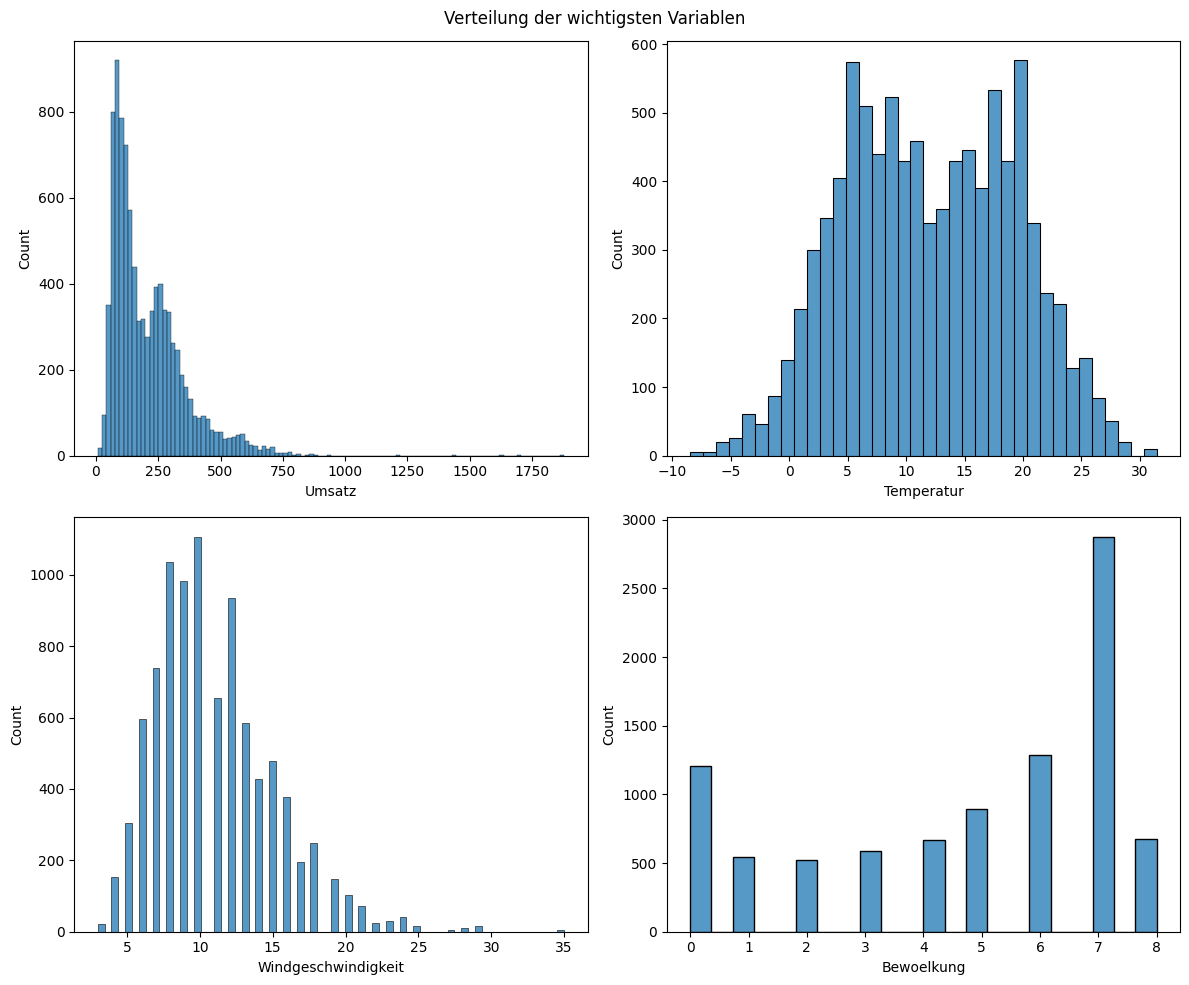

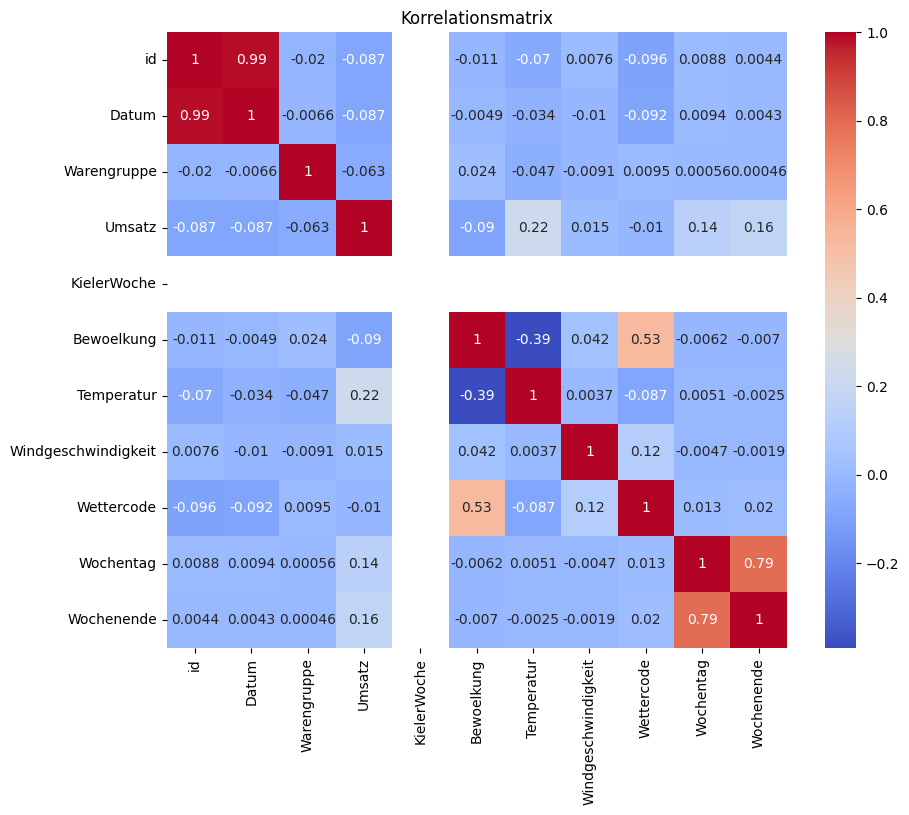

In [3]:
# Erste Zeilen der Datei anzeigen
with open('umsatzdaten_gekuerzt.csv', 'r') as file:
    print(file.readline())  # Header
    print(file.readline())  # Erste Datenzeile

# Daten einlesen mit explizitem Separator
umsatz_df = pd.read_csv('umsatzdaten_gekuerzt.csv', sep=',')  # oder sep=',' je nach Dateiformat
kiwo_df = pd.read_csv('kiwo.csv') 
wetter_df = pd.read_csv('wetter.csv')

# Dataframes zusammenführen
# Hier müssen Sie die passenden Join-Spalten angeben, z.B.:
df = pd.merge(umsatz_df, kiwo_df, on='Datum', how='left')
df = pd.merge(df, wetter_df, on='Datum', how='left')

date = pd.to_datetime(df['Datum'], format='%Y-%m-%d')
df['Datum']= date
df['Wochentag'] = date.dt.day_of_week
df['Wochenende'] = df['Wochentag'].isin([5,6])
# Deskriptive Statistiken
print("\nDeskriptive Statistiken:")
print(df.describe())

# Visualisierungen

# Histogramm der numerischen Variablen
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Verteilung der wichtigsten Variablen')

sns.histplot(data=df, x='Umsatz', ax=axes[0,0])
sns.histplot(data=df, x='Temperatur', ax=axes[0,1]) 
sns.histplot(data=df, x='Windgeschwindigkeit', ax=axes[1,0])
sns.histplot(data=df, x='Bewoelkung', ax=axes[1,1])

plt.tight_layout()
plt.show()

# Korrelationsmatrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()
